### The following are the Features of the dataset:
<img src="Images/Features.png" alt="Alternative text" />
0 = No,
1 = Yes

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import tree
from sklearn import metrics
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the training data into a pandas dataframe
df = pd.read_csv('train.csv')

In [3]:
#Importing the unseen test dataset into a pandas dataframe
df_test = pd.read_csv('test.csv')

# Preliminary Analysis

## Exploratory Data Analysis (EDA)

In [4]:
#Print shape of data (no. of rows and columns)
df.shape

(2000, 21)

In [5]:
#Print first 5 rows of the training dataset
df.head(5)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [6]:
#Printing the summary statistics of the dataset
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
#Print the correlation matrix for the dataset
df.corr()

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

## Data Visualizations

Text(0.5, 1.0, 'Correlation Heatmap')

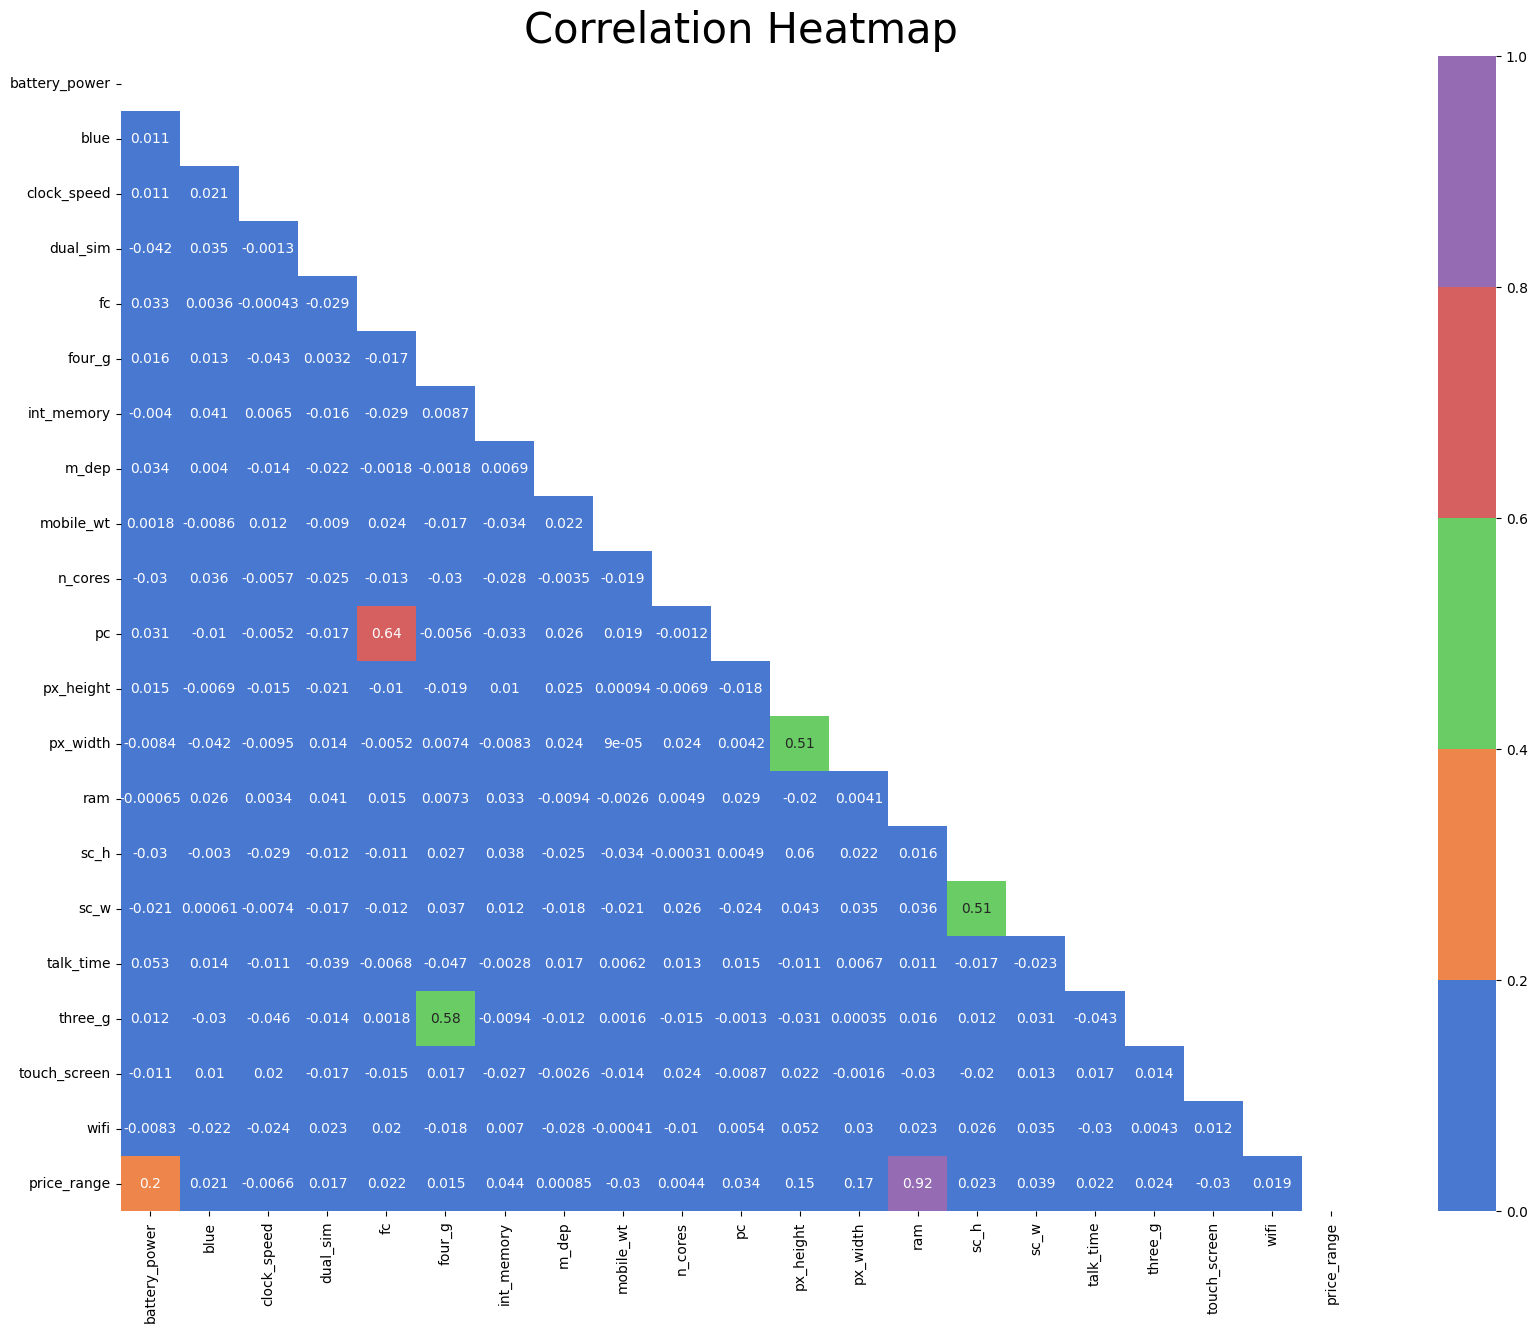

In [9]:
#Plotting a heatmap using the correlation matrix
ax=plt.subplots(figsize=(20,15))
mask=np.triu(np.ones_like(df.corr()))
cmap = sns.color_palette("muted", 5)
heatmap=sns.heatmap(df.corr(),vmin=0,vmax=1,mask=mask,linecolor= 'RED',cmap=cmap,annot=True)
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':30},pad=10)

##### From the heatmap above we can see that the variable 'RAM' has a very high correlation with the dependant variable 'Price Range' while 'Battery Power' has low to moderate correlation with the dependant variable. This means that the independant variables of 'RAM' and 'Battery Power' can impact 'Price Range' depending on the respective correlation (higher correlation signifies a higher impact).

In [10]:
#Box plot of price range variable
fig = px.box(df, y="price_range")
fig.show()

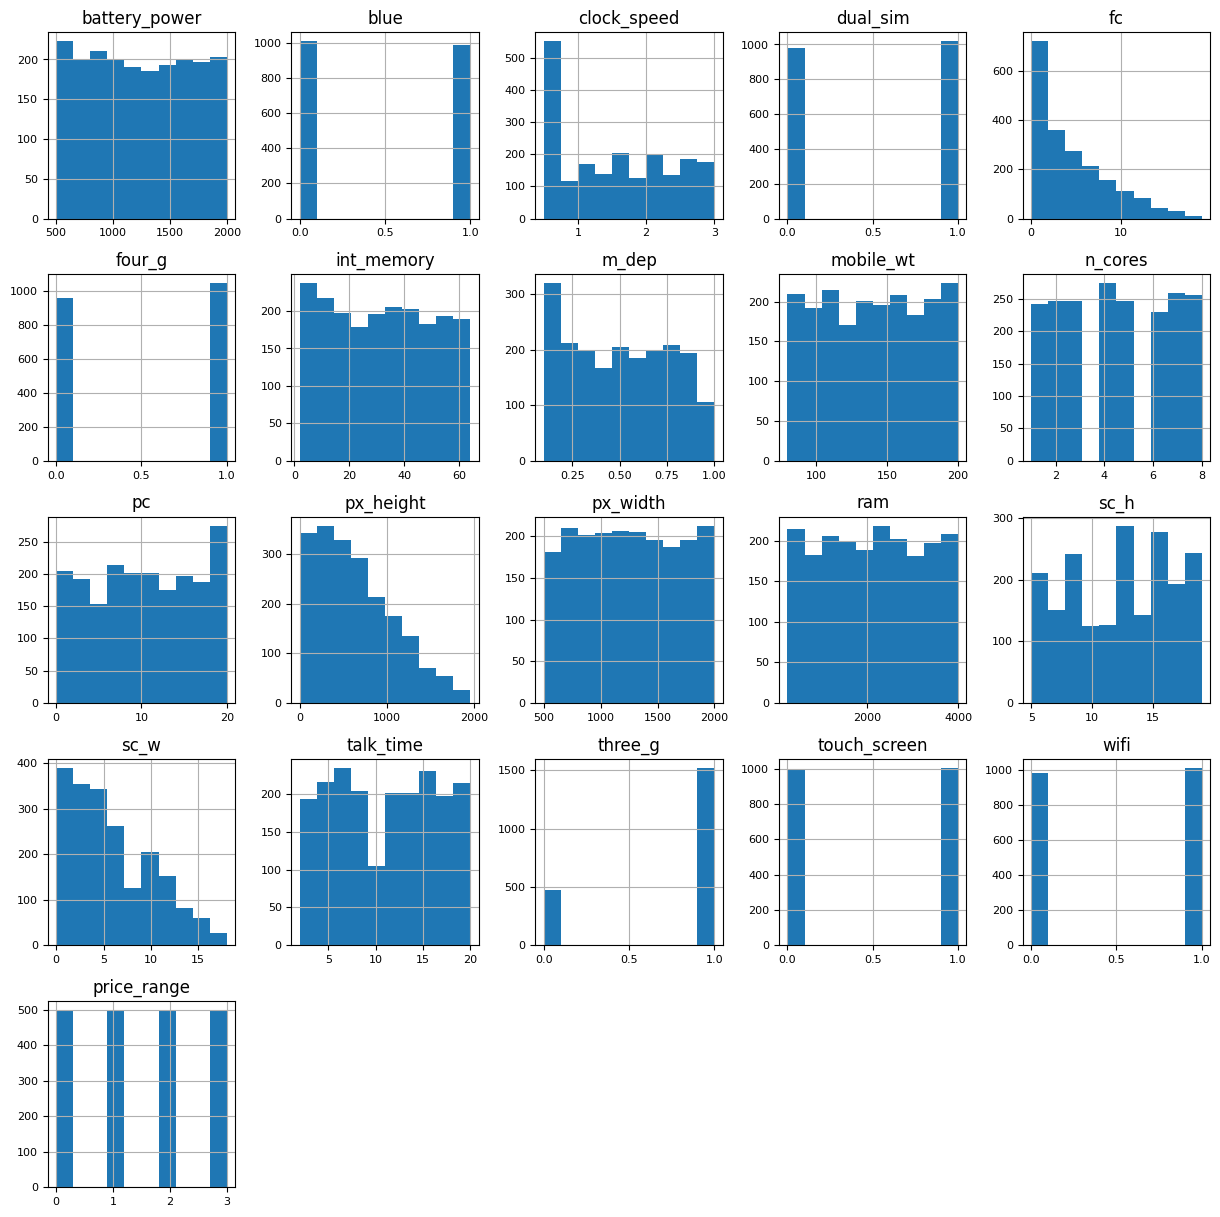

In [11]:
#Histograms for all features of the dataset
df.hist(xlabelsize=8,ylabelsize=8, figsize=(15, 15))
plt.show()

In [12]:
#Reference: https://www.kaggle.com/code/melikedilekci/mobile-price-eda?scriptVersionId=113392828&cellId=36
px.box(df,x='price_range',y='ram',
       color='price_range',template='ggplot2',
       labels={'price_range':'Price Range',
               'ram':'Ram'},
       title="<b>Effect of Ram Capacity on Price")

In [13]:
#Violin plots for Price Range against 3G and 4G functionality (0 = No, 1 = Yes)
fig = px.violin(df, x='three_g', y='price_range', color='four_g', box=True, points="all", hover_data=df.columns)
fig.show()

##### From the above violin plots we can see that upper quartile for price ranges were generally higher for devices having both 3G and 4G technology as compared to ones with just 3G or no 3G functionality.

## Pre-Processing The Data

### Checking for Missing Values

In [14]:
#Checking for missing values, if any, in each column
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [15]:
#Checking for missing values, if any, in each column
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

## Splitting the training dataset, further, into Train and Test sets in the 80:20 ratio respectively

As we were given two separate training and test data, first we built all the algorithms on the training dataset, by splitting it further into train and test set. Then the highest performing algorithm was used to predict the 'Price Range' for the unseen test dataset from the file test.csv

In [16]:
X = df.iloc[:,0:20].values
y = df.iloc[:, 20].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 71)

In [17]:
X_col = df.drop('price_range',axis=1)
y_col = df.drop(df.iloc[:, 0:20],axis = 1)

## Standardization 
Standardizing the dataset using the 'Standard Scaler' to ensure that all the features are on the same scale and to avoid the bias of certain features that have larger scales than others and hence improve performance of machine learning algorithms 

In [18]:
#Standardization
scaler = StandardScaler()

#Scale the training data
X_train = scaler.fit_transform(X_train)

#Apply the scaling to the test data
X_test = scaler.transform(X_test)

#Convert the scaled train and test data to dataframes and add column names
X_train = pd.DataFrame(X_train, columns = X_col.columns)
X_test = pd.DataFrame(X_test, columns = X_col.columns)

In [19]:
X_train.head()

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0       1.138510 -0.987577     1.571452 -1.024039 -0.984327  0.960769   
1       1.708593  1.012579     1.571452  0.976525 -0.984327  0.960769   
2      -1.012874  1.012579     1.571452  0.976525 -0.755580  0.960769   
3       1.600006 -0.987577     1.571452  0.976525  0.845649 -1.040833   
4       0.688326 -0.987577    -0.268476  0.976525  2.446879  0.960769   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0    1.642611  0.694995   0.510567 -1.547920 -1.635537  -0.047570  0.701229   
1   -1.379230 -1.400468  -0.058726  0.198983 -0.977414   0.667995 -0.398411   
2    1.752496 -0.352736   1.108325 -0.237743 -1.306475   0.398526 -0.576669   
3   -0.884747 -1.400468  -1.140383  0.198983  0.009769  -0.024926  1.585572   
4    0.159162 -1.400468   0.937537  0.198983  1.655075  -1.193381  0.224332   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  
0 -1.642392 -0.546333  0.061536   0.540425  0.565802          -1.0 -1.034339  
1 -0.797931  1.105200  1.897588   0.906349  0.565802          -1.0 -1.034339  
2  0.162147 -0.074466 -1.315502  -1.106236  0.565802           1.0 -1.034339  
3  1.396005 -0.782267  0.291043   1.089312 -1.767402           1.0 -1.034339  
4  0.995510  0.397400  0.750056  -0.923273  0.565802          -1.0  0.966801

## Models
- Logistic Regression
- Decision Tree Classifier
- Random Forest
- KNN
- Support Vector Machine

## Logistic Regression Model

As our dependant variable is categorical in nature, comprising of discrete values, i.e (0 = low cost, 1 = medium cost, 2 = high cost and 3 = very high cost) we will use logistic regression instead of linear regression

In [20]:
#Fitting the model
lrm = LogisticRegression(random_state = 7)
lrm.fit(X_train,y_train)

#Make predictions on the test data
lrm_y_pred = lrm.predict(X_test)

# Calculating the accuracy of the model
lrm_accuracy = lrm.score(X_test, y_test)

# Printing the accuracy of the model
print("Accuracy:", lrm_accuracy*100,"%")

#Output the classification results
print("Classification Report:\n", classification_report(y_test, lrm_y_pred))

Accuracy: 97.0 %
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.98      0.96      0.97        90
           2       0.94      0.96      0.95       100
           3       0.97      0.97      0.97       105

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



### Confusion Matrix - Logistic Regression Model

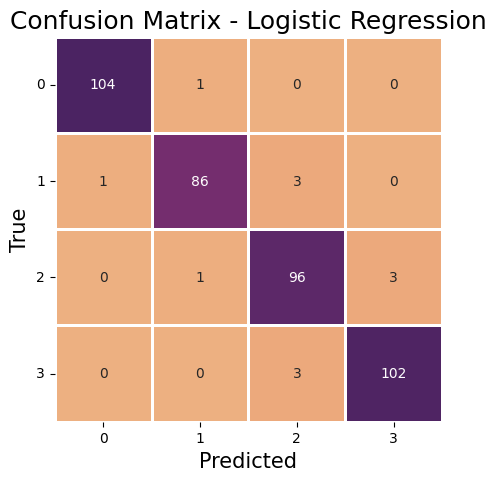

In [21]:
#Reference: https://www.kaggle.com/code/sercanyesiloz/mobile-price-prediction?scriptVersionId=60446478&cellId=56

lrm_conf_matrix = confusion_matrix(y_test, lrm_y_pred)

#selecting the color for the heatmap
cmap= sns.color_palette("flare", as_cmap=True)

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(lrm_conf_matrix, annot=True, cmap=cmap,fmt= '.0f',ax=ax, 
            cbar= False, linewidths = 1)


# Adding labels and plot title
plt.xlabel("Predicted", size= 15)
plt.yticks(rotation = 0)
plt.ylabel("True", size=15)
plt.title("Confusion Matrix - Logistic Regression", size=18)

# display the plot
plt.show()

## Decision Tree

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Creating the decision tree classifier 
decision_tree = tree.DecisionTreeClassifier(max_depth = 7, random_state=7)

# Fitting the classifier to the training data
decision_tree.fit(X_train,y_train)

# Making predictions on the testing data
dt_y_pred = decision_tree.predict(X_test)

# Calculating the accuracy of the model
dt_accuracy = decision_tree.score(X_test, y_test)

# Printing the accuracy of the model
print("Accuracy:", dt_accuracy*100,"%")

#Output the classification results
print("Classification Report:\n", classification_report(y_test, dt_y_pred))

Accuracy: 87.0 %
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       105
           1       0.84      0.79      0.81        90
           2       0.82      0.85      0.83       100
           3       0.91      0.91      0.91       105

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



### Confusion Matrix - Decision Tree

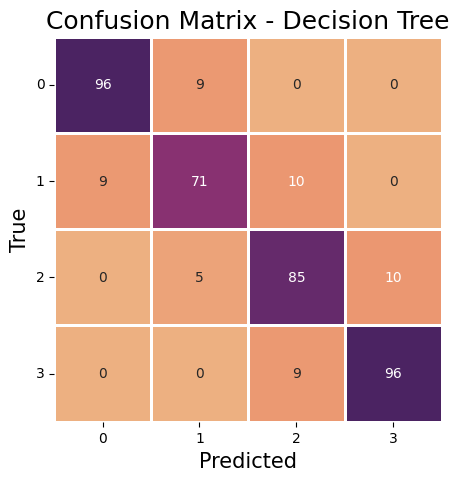

In [23]:
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)

#selecting the color for the heatmap
cmap= sns.color_palette("flare", as_cmap=True)

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(dt_conf_matrix, annot=True, cmap=cmap,fmt= '.0f',ax=ax, 
            cbar= False, linewidths = 1)


# Adding labels and plot title
plt.xlabel("Predicted", size= 15)
plt.yticks(rotation = 0)
plt.ylabel("True", size=15)
plt.title("Confusion Matrix - Decision Tree", size=18)

# display the plot
plt.show()

In [24]:
# Print out the feature importances
feature_importances_dict = {}
for i, name in enumerate(X_col): feature_importances_dict.update({name : decision_tree.feature_importances_[i]})

# Sort features in descending order of importance (need to use reverse=True for descending)  
feature_importances_sorted = dict(sorted(feature_importances_dict.items(), key=lambda x:x[1], reverse=True)) 
# items() method returns (key,value) tuple
print('Features in order of importance:')   
for key in feature_importances_sorted:
    print(key)

Features in order of importance:
ram
battery_power
px_width
px_height
m_dep
mobile_wt
pc
int_memory
sc_w
clock_speed
sc_h
fc
blue
dual_sim
four_g
n_cores
talk_time
three_g
touch_screen
wifi


By changing the max_depth value from 3 to 7, the accuracy has been increased from 74% to 86%. And changing the random_state seed from 71 to 7 has increased this accuracy from 86% to 87%. It has also resulted in a change in feature importance as shown in the following table:

| Features (by importance) | Max Depth = 3 | Max Depth = 7 
| :-: | :-: | :-: |
| 1 | Ram | Ram |
| 2 | Battery Power | Battery Power |
| 3 | Pixel Height | Pixel Width |
| 4 | Bluetooth | Pixel Height |
| 5 | Clock Speed | Mobile Depth |


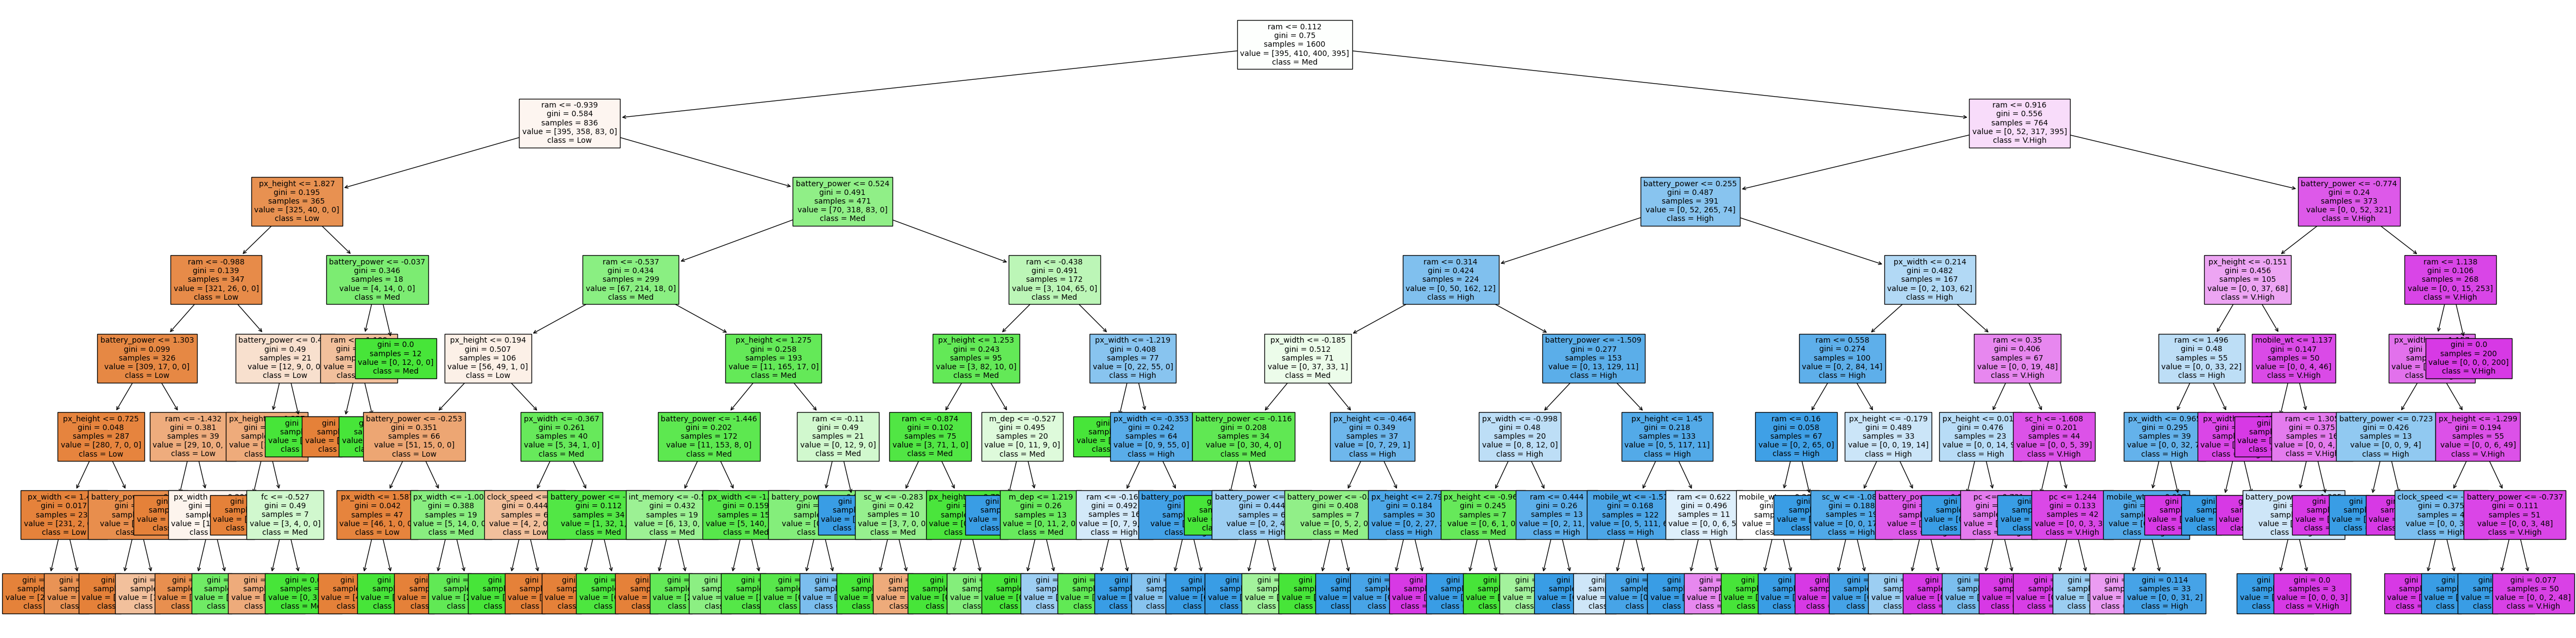

In [25]:
#Assign Labels for the decision tree
X_names = X_col.columns.values
y_names= ['Low', 'Med', 'High', 'V.High']

# Visualize the decision tree
plt.figure(figsize=(60,15))
plot_tree(decision_tree, feature_names=X_names,class_names=y_names,filled=True, fontsize=10)
plt.show()

## Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
# Create the random forest classifier
rf = RandomForestClassifier(n_estimators=400,max_depth=12 , random_state=7,oob_score=True)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Predict the labels of the test data
rf_y_pred = rf.predict(X_test)

# Evaluate the performance of the classifier using score method
rf_accuracy = rf.score(X_test, y_test)
print("Mean Accuracy Score:", rf_accuracy*100,"%")

#Output the classification results
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred))

Mean Accuracy Score: 91.0 %

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.85      0.87      0.86        90
           2       0.86      0.87      0.87       100
           3       0.96      0.94      0.95       105

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



The values: 
Number of trees = 400 and 
Max depth = 12

Produced improved values for Accuracy and F1-score

### Confusion Matrix - Random Forest

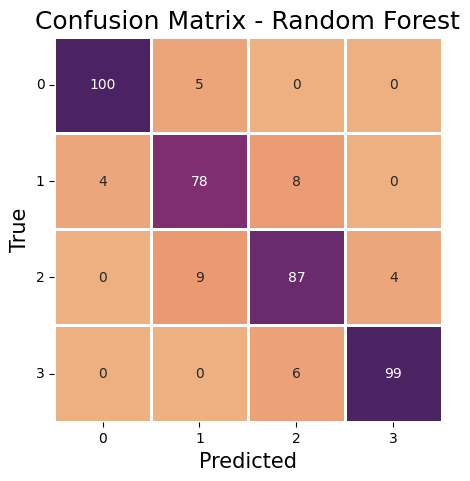

In [27]:
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

#selecting the color for the heatmap
cmap= sns.color_palette("flare", as_cmap=True)

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_conf_matrix, annot=True, cmap=cmap,fmt= '.0f',ax=ax, 
            cbar= False, linewidths = 1)


# Adding labels and plot title
plt.xlabel("Predicted", size= 15)
plt.yticks(rotation = 0)
plt.ylabel("True", size=15)
plt.title("Confusion Matrix - Random Forest", size=18)

# display the plot
plt.show()

## K-Nearest Neighbors (KNN)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

#Creating the KNN classifier
knn = KNeighborsClassifier(n_neighbors=14)

# Fitting the classifier to the training data
knn.fit(X_train,y_train)

#Make predictions on the test data
knn_y_pred = knn.predict(X_test)

# Test the classifier on the testing data
knn_score= knn.score(X_test,y_test)
print("Accuracy:", round(knn_score*100,3),"%")
print("\nClassification Report:\n", classification_report(y_test, knn_y_pred))

Accuracy: 58.0 %

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       105
           1       0.38      0.46      0.41        90
           2       0.48      0.54      0.51       100
           3       0.88      0.55      0.68       105

    accuracy                           0.58       400
   macro avg       0.61      0.58      0.58       400
weighted avg       0.62      0.58      0.59       400



The accuracy of the K-Nearest Neighbors Model drastically fell as the training data was standardized

### Confusion Matrix - KNN

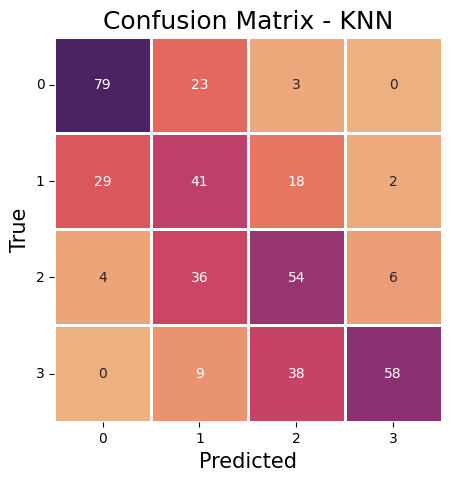

In [29]:
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)

#selecting the color for the heatmap
cmap= sns.color_palette("flare", as_cmap=True)

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_conf_matrix, annot=True, cmap=cmap,fmt= '.0f',ax=ax, 
            cbar= False, linewidths = 1)


# Adding labels and plot title
plt.xlabel("Predicted", size= 15)
plt.yticks(rotation = 0)
plt.ylabel("True", size=15)
plt.title("Confusion Matrix - KNN", size=18)

# display the plot
plt.show()

## Support Vector Machine (SVM)

In [30]:
from sklearn import svm

# Create the SVM classifier
svm_clf = svm.SVC(random_state=7,kernel='linear')

# Fitting the classifier to the training data
svm_clf.fit(X_train, y_train)

# Test the classifier on the testing data
accuracy = svm_clf.score(X_test, y_test)

print('Accuracy:', accuracy*100,"%")

#Make predictions on the test data
svm_y_pred = svm_clf.predict(X_test)

#Output the results
print(classification_report(y_test, svm_y_pred))

Accuracy: 95.25 %
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       105
           1       0.92      0.91      0.92        90
           2       0.92      0.97      0.94       100
           3       0.98      0.98      0.98       105

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



### Confusion Matrix - Support Vector Machine (SVM)

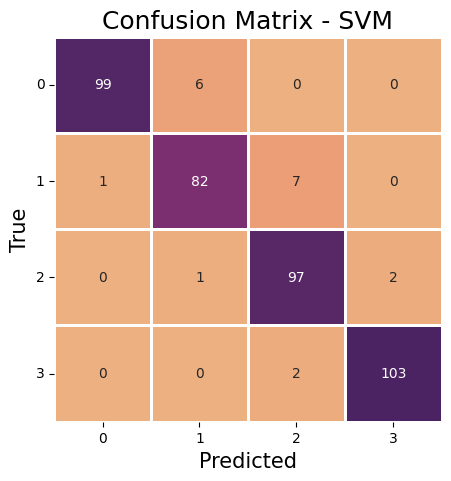

In [31]:
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)

#selecting the color for the heatmap
cmap= sns.color_palette("flare", as_cmap=True)

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(svm_conf_matrix, annot=True, cmap=cmap,fmt= '.0f',ax=ax, 
            cbar= False, linewidths = 1)


# Adding labels and plot title
plt.xlabel("Predicted", size= 15)
plt.yticks(rotation = 0)
plt.ylabel("True", size=15)
plt.title("Confusion Matrix - SVM", size=18)

# display the plot
plt.show()

# Results

In [32]:
#Displaying the results in table format for an easier comparison

# Create a dictionary using the results data
results = {
    'Classifier': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest', 'KNN', 'Support Vector Machine'],
    'Accuracy': [0.97, 0.87, 0.91, 0.61, 0.95],
    'Recall': [0.97, 0.87, 0.91, 0.58, 0.95],
    'Precision': [0.97, 0.87, 0.91, 0.58, 0.95],
    'F1-Score': [0.97, 0.87, 0.91, 0.58, 0.95]
}

# Convert the dictionary to a pandas dataframe
df_results = pd.DataFrame(results)

df_results

Classifier  Accuracy  Recall  Precision  F1-Score
0       Logistic Regression      0.97    0.97       0.97      0.97
1  Decision Tree Classifier      0.87    0.87       0.87      0.87
2             Random Forest      0.91    0.91       0.91      0.91
3                       KNN      0.61    0.58       0.58      0.58
4    Support Vector Machine      0.95    0.95       0.95      0.95

The Logistic Regression algorithm has been the most accurate for the dataset used in this project. It has an accuracy of 97%. Therefore, we will use Logistic Regression to predict the values for the unseen data that is the separate test.csv dataset.

## Price Range Prediction on the separate test dataset

In [33]:
#View the test dataset
df_test.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [34]:
#Dropping the ID column from the test dataset as it is not required for analysis
df_test=df_test.drop('id',axis=1)

## Choosing the most accurate model i.e Logistic Regression

In [35]:
#Apply Standardized scaling to the test data, the same as previously applied to training data
X_new = scaler.transform(df_test)

#Making predictions for the new standardized test data using Logistic Regression
y_predicted_prices = lrm.predict(X_new)

## Add the predicted price range to the test dataset

In [36]:
df_test['price_range']=y_predicted_prices

In [37]:
#Show the results dataset
df_test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  ...        226      1412  3476    12     7   
1      0.8        191        5  ...        746       857  3895     6     0   
2      0.9        186        3  ...       1270      1366  2396    17    10   
3      0.5         96        8  ...        295      1752  3893    10     0   
4      0.5        108        6  ...        749       810  1773    15     8   
..     ...        ...      ...  ...        ...       ...   ...   ...   ...   
995    0.5        170        7  ...        644       913  2121    14     8   
996    0.9        186        4  ...       1152      1632  1933     8     1   
997    0.5         80        1  ...        477       825  1223     5     0   
998    0.4        171        2  ...         38       832  2509    15    11   
999    0.1        140        6  ...        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  price_range  
0            2        0             1     0            3  
1            7        1             0     0            3  
2           10        0             1     1            2  
3            7        1             1     0            3  
4            7        1             0     1            1  
..         ...      ...           ...   ...          ...  
995         15        1             1     0            2  
996         19        0             1     1            1  
997         14        1             0     0            0  
998          6        0             1     0            2  
999          3        1             0     1            2  

[1000 rows x 21 columns]

## Output the results data to a .csv file

In [38]:
#Run the following code to output the test dataset including the predicted price ranges to a .csv file
df_test.to_csv('results.csv')